In [ ]:
import diffusion_curvature
from diffusion_curvature import laziness
from diffusion_curvature.core import plot_3d
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import rbf_kernel
from scipy.stats import wasserstein_distance


# Reload any changes 
%load_ext autoreload
%autoreload 2

In [ ]:
def sample_euclidean_disk(num_pts, seed):
    
    np.random.seed(seed)
    u = np.random.uniform(0, 1, num_pts)
    r = np.sqrt(u)
    theta = np.random.uniform(0, 2*np.pi, num_pts)
    x = np.multiply(r, np.cos(theta))
    y = np.multiply(r, np.sin(theta))
    
    return np.vstack([x,y]).T

def sample_sphere(num_pts, K, seed):
    
    np.random.seed(seed)
    u = np.random.uniform(0, 1, num_pts)
    
    r = np.multiply(np.sqrt(u), np.sin(np.sqrt(K)/2.0)) 
    r = np.multiply(2.0/np.sqrt(K), np.arcsin(r))
    
    theta = np.random.uniform(0, 2*np.pi, num_pts)
    x = np.multiply(r, np.cos(theta))
    y = np.multiply(r, np.sin(theta))
    
    return np.vstack([x,y]).T

def sample_poincare_disk(num_pts, K, seed):
    
    np.random.seed(seed)
    u = np.random.uniform(0, 1, num_pts)
    
    r = np.multiply(np.sqrt(u), np.sinh(np.sqrt(-K)/2.0)) 
    r = np.multiply(2.0/np.sqrt(-K), np.arcsinh(r))
    
    theta = np.random.uniform(0, 2*np.pi, num_pts)
    x = np.multiply(r, np.cos(theta))
    y = np.multiply(r, np.sin(theta))
    
    return np.vstack([x,y]).T

def sample_const_curvature(num_pts, K, seed):
    
    if K == 0:
        return sample_euclidean_disk(num_pts, seed)
    elif K > 0:
        assert(K <= 2)
        return sample_sphere(num_pts, K, seed)
    else:
        assert(K < 0)
        return sample_poincare_disk(num_pts, K, seed)
    
def plot_pt_cloud(data):
    
    plt.figure(figsize=(2,2), dpi=250)
    plt.plot(data[:,0], data[:,1], 'o', color="dimgray", markersize=1, alpha=0.75, markeredgewidth=0)
    plt.xticks([])
    plt.yticks([])
    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    plt.show()
    
def compare_pt_clouds(pc1, pc2):
    
    plt.figure(figsize=(2,2), dpi=250)
    plt.plot(pc1[:,0], pc1[:,1], 'o', color="blue", markersize=1, alpha=0.75, markeredgewidth=0)
    plt.plot(pc2[:,0], pc2[:,1], 'o', color="red", markersize=1, alpha=0.75, markeredgewidth=0)
    plt.xticks([])
    plt.yticks([])
    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    plt.show()
    
def viz_diffusion_probability(X, probs, cmin=None, cmax=None):
    
    plt.figure(figsize=(2.5,2), dpi=250, frameon=False)
    plt.scatter(X[:,0], X[:,1], c=probs, cmap='coolwarm', s=0.8, alpha=0.75, vmin=cmin, vmax=cmax)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=5)
    plt.xticks([])
    plt.yticks([])
    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    plt.show()
    
def diffusion_op(X, t):
    
    n = X.shape[0]
    
    epsilon = np.pi/n
    
    A = rbf_kernel(X, gamma=1.0/epsilon)  # affinity matrix
    
    Q = np.sum(A, axis=1)
    K = np.diag(1.0 / Q) @ A @ np.diag(1.0 / Q)
    P = np.diag(1.0 / np.sum(K, axis=1)) @ K
    
    P_t = np.linalg.matrix_power(P, t)
    
    X_upd = P_t @ X
    
    return (X_upd, P)

def dirac_diffusion_probabilities(X, t):

    X_augmented = np.vstack([X, [0.0, 0.0]])
    n = X_augmented.shape[0]
    
    epsilon = np.pi/n
    
    A = rbf_kernel(X_augmented, gamma=1.0/epsilon)  # affinity matrix
    
    Q = np.sum(A, axis=1)
    K = np.diag(1.0 / Q) @ A @ np.diag(1.0 / Q)
    P = np.diag(1.0 / np.sum(K, axis=1)) @ K
    
    P_t = np.linalg.matrix_power(P, t)
    
    signal = np.vstack([np.zeros((n-1, 1)), 1.0])
    
    diffused_signal = P_t @ signal 
    diffused_signal = [x[0] for x in diffused_signal]
    
    return (diffused_signal, X_augmented)

def save_pt_cloud(data, annot, fpath):
    
    plt.figure(figsize=(2,2), dpi=250)
    plt.plot(data[:,0], data[:,1], 'o', color="dimgray", markersize=1, alpha=0.75, markeredgewidth=0)
    plt.text(0.65,1, annot, fontsize=6)
    plt.xticks([])
    plt.yticks([])
    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    plt.tight_layout()
    plt.savefig(fpath)
    plt.close()

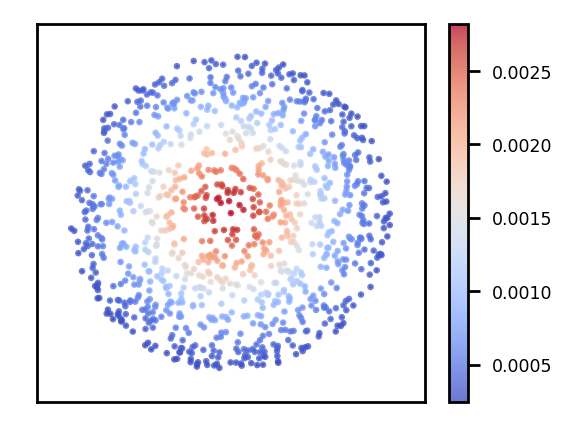

In [ ]:
X = sample_const_curvature(1000,-2,42)
X = np.row_stack([[0,0],X])
P = diffusion_curvature.core.DiffusionMatrix(X,kernel_type='anisotropic',sigma=0.4)
ks = laziness.curvature(P,diffusion_powers=8,aperture=1,smoothing=1)
viz_diffusion_probability(X,P[0])

  0%|          | 0/20 [00:00<?, ?it/s]

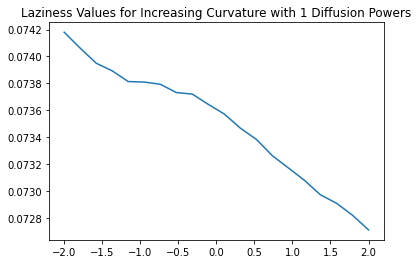

  0%|          | 0/20 [00:00<?, ?it/s]

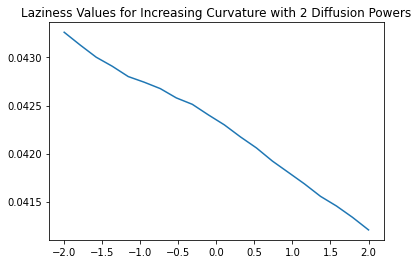

  0%|          | 0/20 [00:00<?, ?it/s]

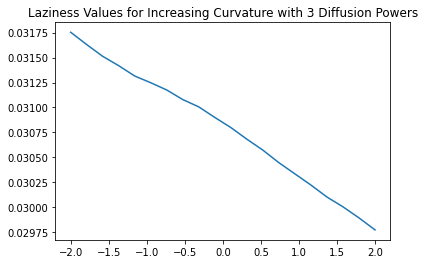

  0%|          | 0/20 [00:00<?, ?it/s]

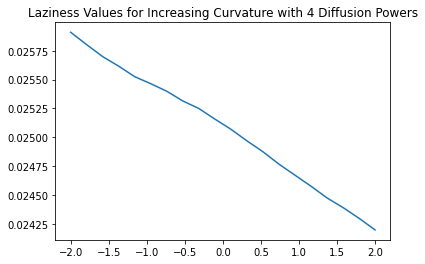

  0%|          | 0/20 [00:00<?, ?it/s]

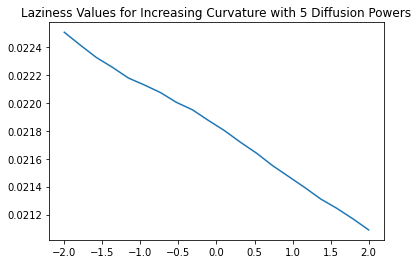

  0%|          | 0/20 [00:00<?, ?it/s]

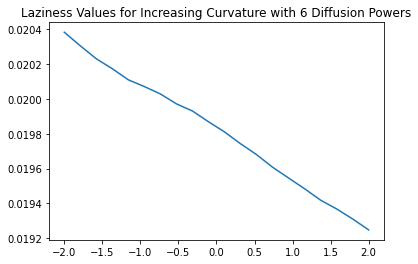

  0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
from diffusion_curvature import laziness
from tqdm.notebook import trange
K_vals = np.linspace(-2, 2, 20)
laziness_vals = np.empty([20])
dps = list(range(1,16))
for dp in dps:
    for itr in trange(len(K_vals)):
        K = K_vals[itr]
        X = sample_const_curvature(1000, K, 123)
        X = np.row_stack([[0,0],X])
        P = diffusion_curvature.core.DiffusionMatrix(X,kernel_type='anisotropic',sigma=0.5)
        ks = laziness.curvature(P,aperture=10,diffusion_powers = dp)
        laziness_vals[itr] = ks[0]
    fig, ax = plt.subplots(1)
    ax.plot(K_vals,laziness_vals)
    ax.set_title(f"Laziness Values for Increasing Curvature with {dp} Diffusion Powers")
    plt.show()

Text(0.5, 1.0, 'Laziness Values for Increasing Curvature')

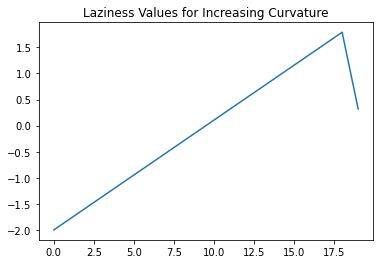

In [ ]:
plt.plot(laziness_vals)
plt.title("Laziness Values for Increasing Curvature")